In [89]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI4 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI4")
X_train = DKI4.index.values.reshape(-1, 1)
y_train = DKI4['SO2'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['SO2'].min()
max_par = DKI4['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.127
MSE: 0.016
MAE: 0.111
R-Squared: -1.300
       Tanggal        SO2
0   2022-11-30  70.000000
1   2022-12-01  70.000000
2   2022-12-02  68.571429
3   2022-12-03  67.142857
4   2022-12-04  67.142857
5   2022-12-05  65.714286
6   2022-12-06  64.285714
7   2022-12-07  64.285714
8   2022-12-08  62.857143
9   2022-12-09  62.857143
10  2022-12-10  62.571429
11  2022-12-11  61.428571
12  2022-12-12  61.428571
13  2022-12-13  60.000000
14  2022-12-14  60.000000
15  2022-12-15  58.571429
16  2022-12-16  58.571429
17  2022-12-17  57.142857
18  2022-12-18  57.142857
19  2022-12-19  55.714286
20  2022-12-20  55.714286
21  2022-12-21  55.428571
22  2022-12-22  55.428571
23  2022-12-23  54.285714
24  2022-12-24  54.285714
25  2022-12-25  52.857143
26  2022-12-26  52.857143
27  2022-12-27  51.428571
28  2022-12-28  51.428571
29  2022-12-29  50.000000


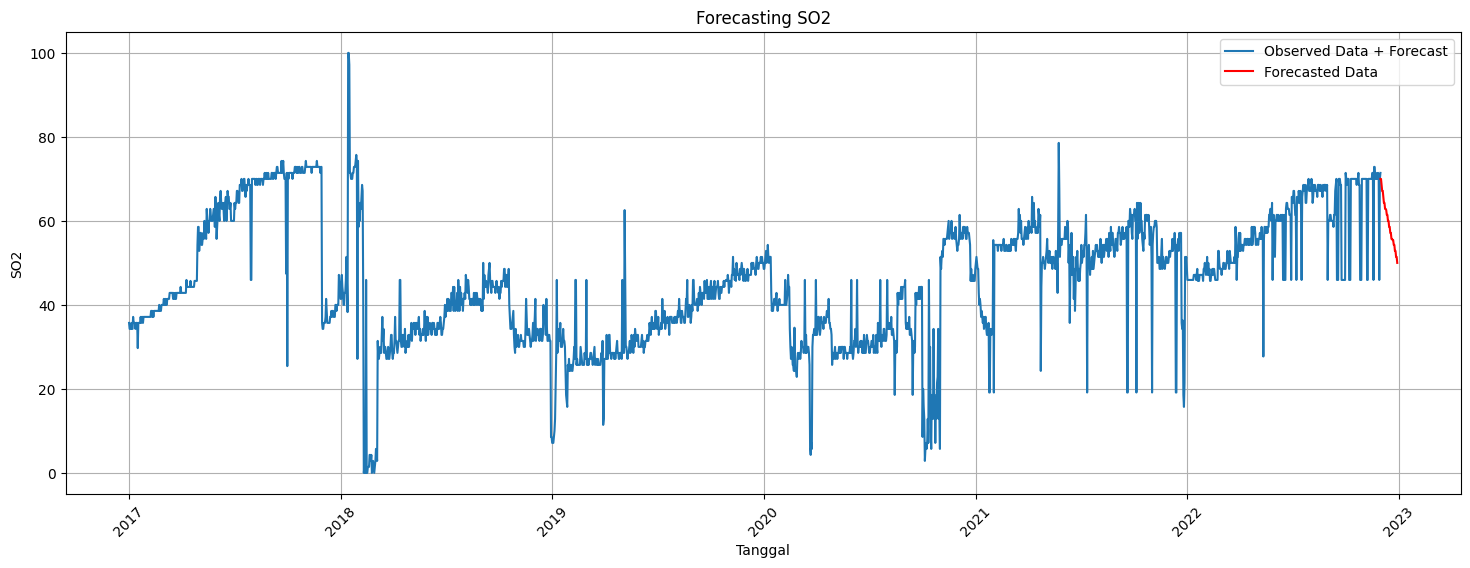

In [91]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['SO2'].min()
max_par = DKI4['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.301
MSE: 0.091
MAE: 0.290
R-Squared: -11.891
       Tanggal         SO2
0   2022-11-30  100.000000
1   2022-12-01  100.000000
2   2022-12-02  100.000000
3   2022-12-03  100.000000
4   2022-12-04  100.000000
5   2022-12-05  100.000000
6   2022-12-06   97.142857
7   2022-12-07   68.571429
8   2022-12-08   58.571429
9   2022-12-09   50.000000
10  2022-12-10   44.285714
11  2022-12-11   41.428571
12  2022-12-12   40.000000
13  2022-12-13   38.571429
14  2022-12-14   38.571429
15  2022-12-15   38.571429
16  2022-12-16   38.571429
17  2022-12-17   38.571429
18  2022-12-18   38.571429
19  2022-12-19   38.571429
20  2022-12-20   38.571429
21  2022-12-21   38.571429
22  2022-12-22   38.571429
23  2022-12-23   38.571429
24  2022-12-24   38.571429
25  2022-12-25   38.571429
26  2022-12-26   38.571429
27  2022-12-27   38.571429
28  2022-12-28   38.571429
29  2022-12-29   38.571429


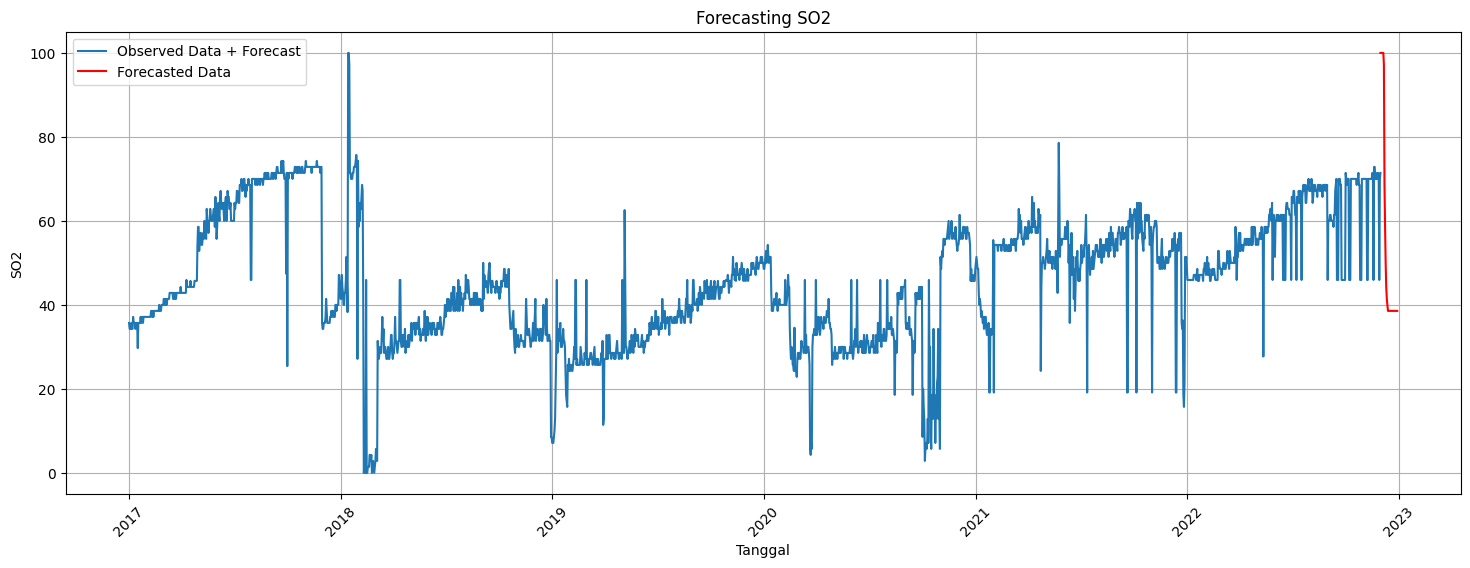

In [93]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['SO2'].min()
max_par = DKI4['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.120
MSE: 0.015
MAE: 0.120
R-Squared: -1.064
       Tanggal        SO2
0   2022-11-30  58.571429
1   2022-12-01  58.571429
2   2022-12-02  58.571429
3   2022-12-03  58.571429
4   2022-12-04  58.571429
5   2022-12-05  58.571429
6   2022-12-06  58.571429
7   2022-12-07  58.571429
8   2022-12-08  58.571429
9   2022-12-09  58.571429
10  2022-12-10  58.571429
11  2022-12-11  58.571429
12  2022-12-12  58.571429
13  2022-12-13  58.571429
14  2022-12-14  58.571429
15  2022-12-15  58.571429
16  2022-12-16  58.571429
17  2022-12-17  58.571429
18  2022-12-18  58.571429
19  2022-12-19  58.571429
20  2022-12-20  58.571429
21  2022-12-21  58.571429
22  2022-12-22  58.571429
23  2022-12-23  58.571429
24  2022-12-24  58.571429
25  2022-12-25  58.571429
26  2022-12-26  58.571429
27  2022-12-27  58.571429
28  2022-12-28  58.571429
29  2022-12-29  58.571429


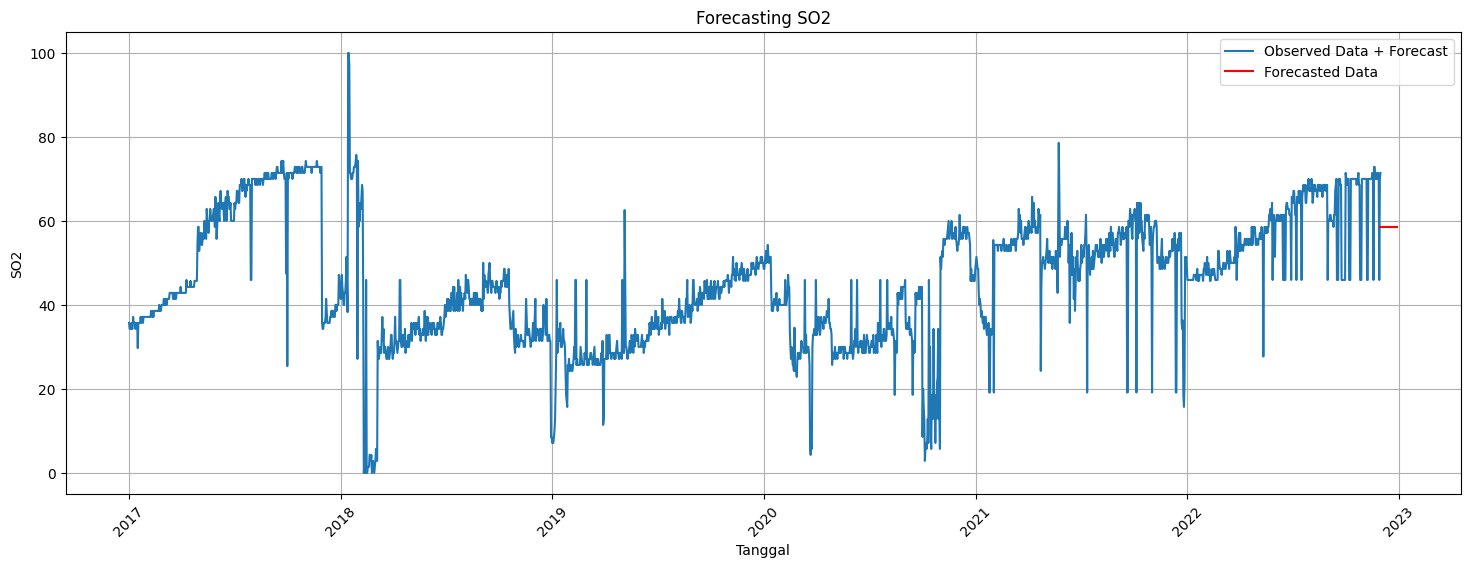

In [95]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['SO2'].min()
max_par = DKI4['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.215
MSE: 0.046
MAE: 0.202
R-Squared: -5.569
       Tanggal        SO2
0   2022-11-30  47.428571
1   2022-12-01  47.428571
2   2022-12-02  47.428571
3   2022-12-03  47.428571
4   2022-12-04  47.428571
5   2022-12-05  47.428571
6   2022-12-06  47.428571
7   2022-12-07  47.428571
8   2022-12-08  47.428571
9   2022-12-09  47.428571
10  2022-12-10  47.428571
11  2022-12-11  47.428571
12  2022-12-12  47.428571
13  2022-12-13  47.428571
14  2022-12-14  47.428571
15  2022-12-15  47.428571
16  2022-12-16  47.428571
17  2022-12-17  47.428571
18  2022-12-18  47.428571
19  2022-12-19  47.428571
20  2022-12-20  47.428571
21  2022-12-21  47.428571
22  2022-12-22  47.428571
23  2022-12-23  47.428571
24  2022-12-24  47.428571
25  2022-12-25  47.428571
26  2022-12-26  47.428571
27  2022-12-27  47.428571
28  2022-12-28  47.428571
29  2022-12-29  47.428571


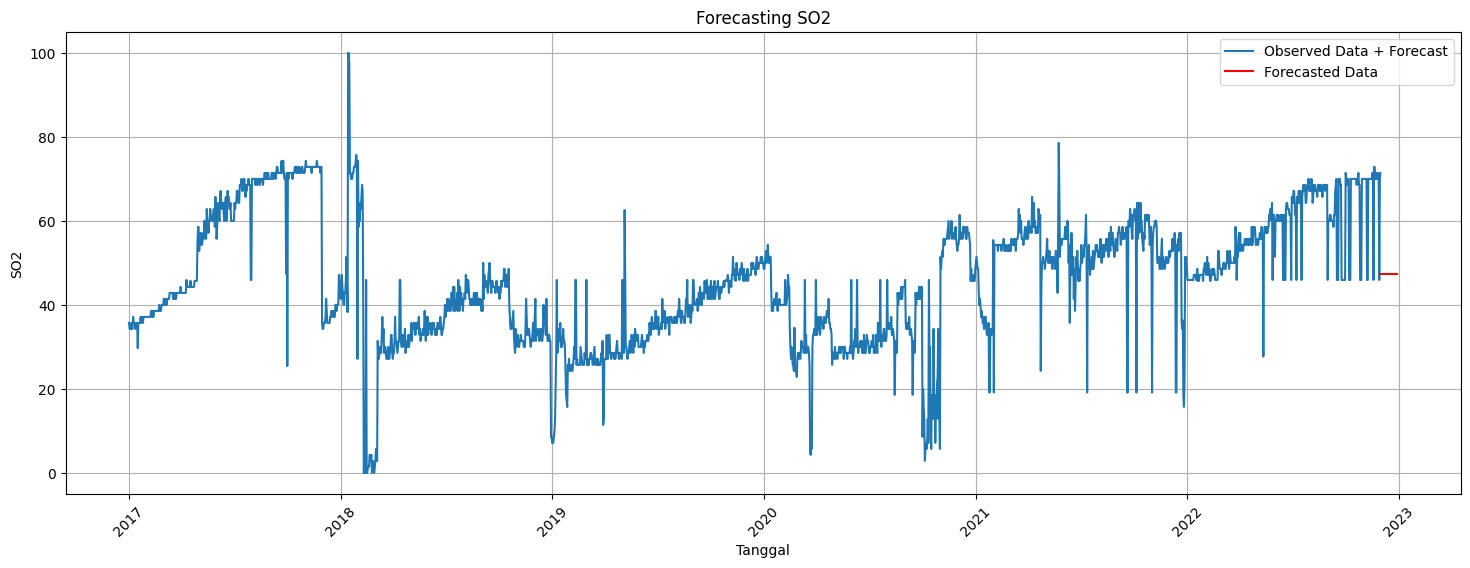

In [97]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['SO2'].min()
max_par = DKI4['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.218
MSE: 0.047
MAE: 0.204
R-Squared: -5.731
       Tanggal        SO2
0   2022-11-30  47.142857
1   2022-12-01  47.142857
2   2022-12-02  47.142857
3   2022-12-03  47.142857
4   2022-12-04  47.142857
5   2022-12-05  47.142857
6   2022-12-06  47.142857
7   2022-12-07  47.142857
8   2022-12-08  47.142857
9   2022-12-09  47.142857
10  2022-12-10  47.142857
11  2022-12-11  47.142857
12  2022-12-12  47.142857
13  2022-12-13  47.142857
14  2022-12-14  47.142857
15  2022-12-15  47.142857
16  2022-12-16  47.142857
17  2022-12-17  47.142857
18  2022-12-18  47.142857
19  2022-12-19  47.142857
20  2022-12-20  47.142857
21  2022-12-21  47.142857
22  2022-12-22  47.142857
23  2022-12-23  47.142857
24  2022-12-24  47.142857
25  2022-12-25  47.142857
26  2022-12-26  47.142857
27  2022-12-27  47.142857
28  2022-12-28  47.142857
29  2022-12-29  47.142857


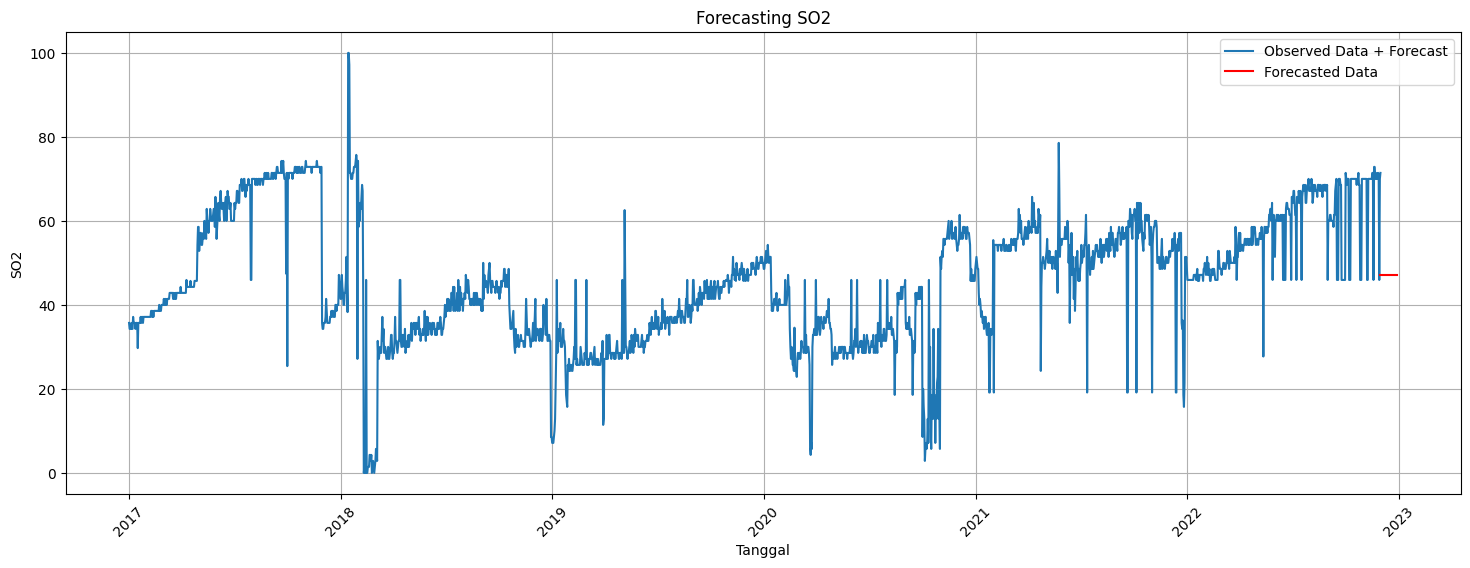

In [99]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
